# Example and demo of collaboration_count function

In [1]:
from knetwork import collaboration_count as colcnt
import matplotlib.pyplot as plt

In [2]:
#Enter data_source, year_list, country_list and column_name:
data_source = 'web of science'
year_list = range(2000,2017)
country_list = ['USA','Mexico','Canada','Guatemala','Cuba','Dominican Republic','Haiti','Honduras','El Salvador','Nicaragua','Costa Rica','Panama','Jamaica','Trinidad',
                'Brazil','Colombia','Argentina','Venezuela','Peru','Chile','Ecuador','Bolivia','Paraguay','Uruguay',
                'Nigeria','Algeria','Congo','Sudan','Chad','Niger','Angola','Mali','South Africa','Ethiopia','Egypt','Tanzania','Morocco','Kenya','Uganda','Ghana','Mozambique','Madagascar','Cameroon','Ivory Coast','Zambia','Zimbabwe','Malawi','Senegal','Somalia',
                'China','India','Indonesia','Pakistan','Bangladesh','Russia','Japan','Philippines','Vietnam','Turkey','Iran','Thailand','Myanmar','Korea','Iraq','Arabia','Malaysia','Uzbekistan','Nepal','Afghanistan','Yemen','Syria','Sri Lanka','Cambodia','Azerbaijan','Emirates','Tajikistan','Israel','Laos','Jordan','Singapore','Lebanon','Kuwait','Oman','Qatar','Bahrain','Taiwan',
                'Germany','France','Kingdom','Italy','UK','Spain','Ukraine','Poland','Romania','Netherlands','Belgium','Greece','Czech','Portugal','Hungary','Sweden','Austria','Belarus','Switzerland','Bulgaria','Denmark','Slovakia','Finland','Norway','Georgia','Ireland','Croatia','Bosnia','Moldova','Lithuania','Latvia','Macedonia','Slovenia','Estonia','Cyprus','Montenegro','Luxembourg','Malta','Iceland','Andorra','Liechtenstein','San Marino','Monaco','Vatican',
                'Australia','New Zealand','Papau New Guinea'
                ]
column_name = 'C1'
continent={}

In [3]:
for i in range(country_list.index('USA'),country_list.index('Trinidad')+1):
    continent[country_list[i]]='North America'
for i in range(country_list.index('Brazil'),country_list.index('Uruguay')+1):
    continent[country_list[i]]='South America'
for i in range(country_list.index('Nigeria'),country_list.index('Somalia')+1):
    continent[country_list[i]]='Africa'
for i in range(country_list.index('China'),country_list.index('Taiwan')+1):
    continent[country_list[i]]='Asia'
for i in range(country_list.index('Germany'),country_list.index('Vatican')+1):
    continent[country_list[i]]='Europe'
for i in range(country_list.index('Australia'),country_list.index('Papau New Guinea')+1):
    continent[country_list[i]]='Oceania'

In [4]:
list_of_year_wise_results = colcnt.count_all_years(data_source,year_list,country_list,column_name)

In [5]:
#Year wise results
#Enter any year between 2000-2016 to see result matrix
a = 2003
#Get results
b=list_of_year_wise_results[a-2000]

In [6]:
list_of_year_wise_results[2][0][0]

290.0

In [24]:
yearwise_count={}
country=[]
edge_label=[]
edge_weight=[]
node_weight=[]
year=[]
year_total=[]
cont=[]
percent_of_total_pubs=[]
rank=[]
c=0

#Rank of country
v={}
for c in year_list:
    val1[c-2000]={}
    for i in range(len(country_list)):
        val1[c-2000][country_list[i]]=list_of_year_wise_results[c-2000][i][i]
    v[c-2000]={key: rank for rank, key in enumerate(sorted(val1[c-2000], key=val1[c-2000].get, reverse=True), 1)}

#Total count in a year
for c in year_list:
    val=0
    for i in range(len(country_list)):
        val=val+list_of_year_wise_results[c-2000][i][i]
    yearwise_count[c]=val

#Creating columns of csv
for c in year_list:
    for i in range(len(country_list)):
        for j in range(i+1,len(country_list)):
            country.append(country_list[i])
            country.append(country_list[j])
            edge_label.append('%s & %s'%(country_list[i],country_list[j]))
            edge_label.append('%s & %s'%(country_list[i],country_list[j]))
            edge_weight.append(list_of_year_wise_results[c-2000][i][j])
            edge_weight.append(list_of_year_wise_results[c-2000][i][j])
            node_weight.append(list_of_year_wise_results[c-2000][i][i])
            node_weight.append(list_of_year_wise_results[c-2000][j][j])
            year.append(c)
            year.append(c)
            year_total.append(yearwise_count[c])
            year_total.append(yearwise_count[c])
            cont.append(continent[country_list[i]])
            cont.append(continent[country_list[j]])
            percent_of_total_pubs.append(list_of_year_wise_results[c-2000][i][i]*100/yearwise_count[c])
            percent_of_total_pubs.append(list_of_year_wise_results[c-2000][j][j]*100/yearwise_count[c])
            rank.append('%d/%d'%(v[c-2000][country_list[i]],len(country_list)))
            rank.append('%d/%d'%(v[c-2000][country_list[j]],len(country_list)))
import pandas as pd
df=pd.DataFrame(data=[year,country,country,edge_weight,node_weight,edge_label,year_total,cont,percent_of_total_pubs,rank]).T
df.rename(columns={0:'Year',1:'Country',2:'Country1',3:'No. of Collaborations',4:'No. of Publications',5:'Collaborators',6:'Total No. of Publications',7:'Continent',8:'Percent of Total Publications',9:'Rank'},inplace=True)
df=df.loc[(df!=0).all(1)]
df.to_csv('knetwork1.csv')

In [22]:
df

,Year,Country 1,Country 2,No. of Collaborations,No. of Publications of Country 1,No. of Publications of Country 2,Collaborators,Total No. of Publications,Continent of Country 1,Continent of Country 2,Percent of Total Publications of Country 1,Percent of Total Publications of Country 2,Rank of Country 1,Rank of Country 2
0,2000,USA,Mexico,5,286,8,USA & Mexico,1391,North America,North America,20.5607,0.575126,1/133,25/133
1,2000,USA,Canada,5,286,33,USA & Canada,1391,North America,North America,20.5607,2.37239,1/133,10/133
16,2000,USA,Venezuela,1,286,1,USA & Venezuela,1391,North America,South America,20.5607,0.0718907,1/133,57/133
33,2000,USA,Egypt,1,286,8,USA & Egypt,1391,North America,Africa,20.5607,0.575126,1/133,26/133
48,2000,USA,China,3,286,27,USA & China,1391,North America,Asia,20.5607,1.94105,1/133,12/133
53,2000,USA,Russia,14,286,110,USA & Russia,1391,North America,Asia,20.5607,7.90798,1/133,4/133
54,2000,USA,Japan,20,286,205,USA & Japan,1391,North America,Asia,20.5607,14.7376,1/133,2/133
61,2000,USA,Korea,1,286,47,USA & Korea,1391,North America,Asia,20.5607,3.37886,1/133,7/133
63,2000,USA,Arabia,1,286,2,USA & Arabia,1391,North America,Asia,20.5607,0.143781,1/133,43/133
75,2000,USA,Israel,3,286,15,USA & Israel,1391,North America,Asia,20.5607,1.07836,1/133,17/133


In [53]:
#Function to create and export dataframe as CSV
def get_csv(list_of_year_wise_results,country_list):
    x=[]
    columns=[]
    for i in range(len(country_list)):
        for j in range(len(country_list)):
            x.append([list_of_year_wise_results[k][country_list.index(country_list[i])][country_list.index(country_list[j])] for k in range(len(year_list))])
            if i == j:
                columns.append('%s'%(country_list[i]))
            else:
                columns.append('%s & %s'%(country_list[i],country_list[j]))
    data = pd.DataFrame(x,columns=range(2000,2017)).T
    data.columns = [columns]
    data.index.name = 'Year'
    data.to_csv('collaboration_data.csv')

In [54]:
get_csv(list_of_year_wise_results,country_list)

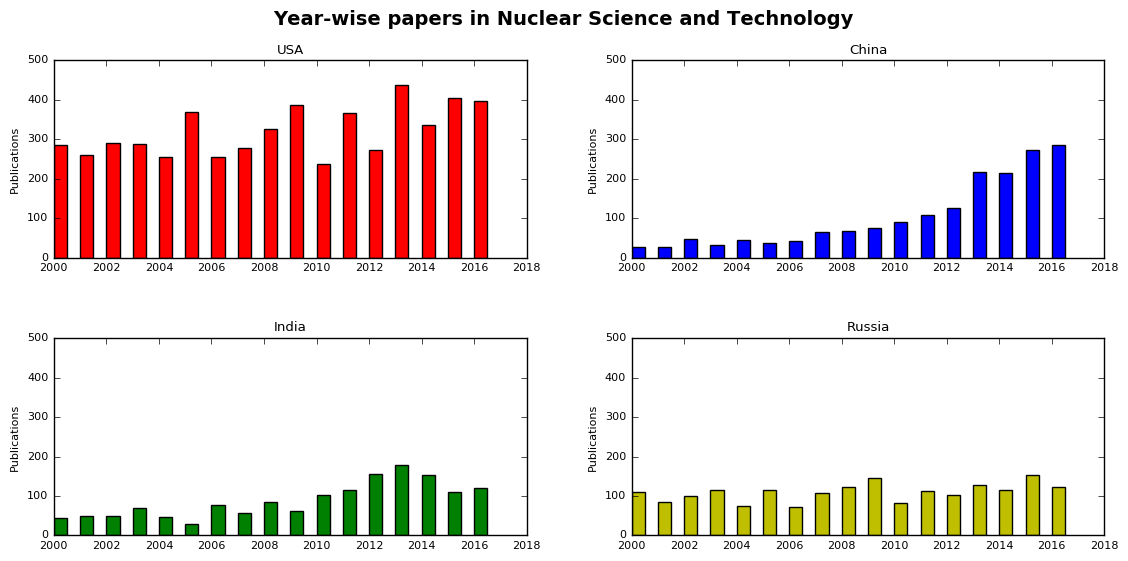

In [6]:
#Simple bar graph for any 4 countries
#Enter 4 countries as a list
country_names = ['USA','China','India','Russia']

#Code to plot bar graphs of 4 countries specified above
country1 = [list_of_year_wise_results[i][country_list.index(country_names[0])][country_list.index(country_names[0])] for i in range(len(year_list))]
country2 = [list_of_year_wise_results[i][country_list.index(country_names[1])][country_list.index(country_names[1])] for i in range(len(year_list))]
country3 = [list_of_year_wise_results[i][country_list.index(country_names[2])][country_list.index(country_names[2])] for i in range(len(year_list))]
country4 = [list_of_year_wise_results[i][country_list.index(country_names[3])][country_list.index(country_names[3])] for i in range(len(year_list))]

fig = plt.figure(figsize=(12,6))
fig.suptitle('Year-wise papers in Nuclear Science and Technology', fontsize=14, fontweight='bold')
plt.rcParams.update({'font.size': 8})

axes = fig.add_subplot(221)
axes.bar(year_list, country1, 0.5, color='r')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[0])

axes = fig.add_subplot(222)
axes.bar(year_list, country2, 0.5, color='b')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[1])

axes = fig.add_subplot(223)
axes.bar(year_list, country3, 0.5, color='g')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[2])

axes = fig.add_subplot(224)
axes.bar(year_list, country4, 0.5, color='y')
axes.set_ylabel('Publications')
axes.set_ylim(0,500)
axes.set_title('%s'%country_names[3])

plt.tight_layout(pad=4, w_pad=4)
plt.show()

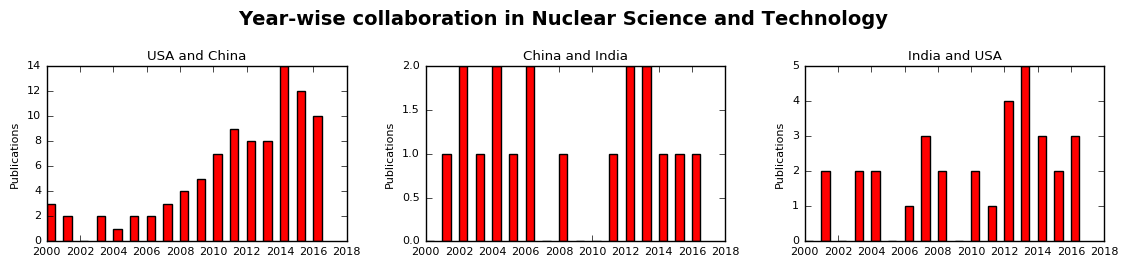

In [7]:
#Collaboration between 3 countries
#Enter 3 countries as a list:
coll_countries = ['USA','China','India']
count1 = [list_of_year_wise_results[i][country_list.index(coll_countries[0])][country_list.index(coll_countries[1])] for i in range(len(year_list))]
count2 = [list_of_year_wise_results[i][country_list.index(coll_countries[1])][country_list.index(coll_countries[2])] for i in range(len(year_list))]
count3 = [list_of_year_wise_results[i][country_list.index(coll_countries[2])][country_list.index(coll_countries[0])] for i in range(len(year_list))]

fig = plt.figure(figsize=(12,3))
fig.suptitle('Year-wise collaboration in Nuclear Science and Technology', fontsize=14, fontweight='bold')
plt.rcParams.update({'font.size': 8})

axes = fig.add_subplot(131)
axes.bar(year_list, count1, 0.5, color='r')
axes.set_ylabel('Publications')
axes.set_ylim(0,max(count1))
axes.set_title('%s and %s'%(coll_countries[0],coll_countries[1]))

axes = fig.add_subplot(132)
axes.bar(year_list, count2, 0.5, color='r')
axes.set_ylabel('Publications')
axes.set_ylim(0,max(count2))
axes.set_title('%s and %s'%(coll_countries[1],coll_countries[2]))

axes = fig.add_subplot(133)
axes.bar(year_list, count3, 0.5, color='r')
axes.set_ylabel('Publications')
axes.set_ylim(0,max(count3))
axes.set_title('%s and %s'%(coll_countries[2],coll_countries[0]))

plt.tight_layout(pad=4, w_pad=2)
plt.show()